In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
results_path = '../src_results/8.csv'
if not os.path.exists(results_path):
    print(f"Error: File {results_path} not found. Run the C++ benchmark first!")
else:
    print("Data file found.")

Data file found.


In [ ]:
df = pd.read_csv(results_path)


base_times_list = []
for config in df['Config'].unique():
    config_base = df[(df['Threads'] == 1) & (df['Config'] == config)][['Config', 'Time']]
    config_base = config_base.rename(columns={'Time': 'BaseTime'})
    base_times_list.append(config_base)

base_times = pd.concat(base_times_list, ignore_index=True)

df = pd.merge(df, base_times, on=['Config'], how='left')

df['Time_ms'] = df['Time'] * 1000
df['Speedup'] = df['BaseTime'] / df['Time']
df['Efficiency'] = df['Speedup'] / df['Threads']

configs = df['Config'].unique()

metrics = [
    ('Time_ms', 'Time (ms)'),
    ('Speedup', 'Speedup'),
    ('Efficiency', 'Efficiency')
]


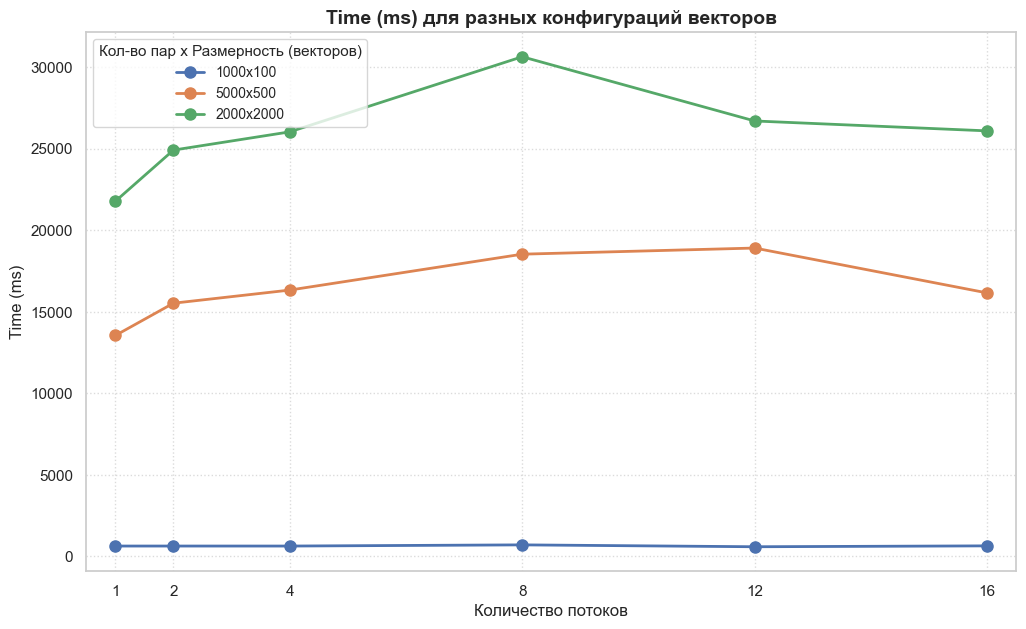

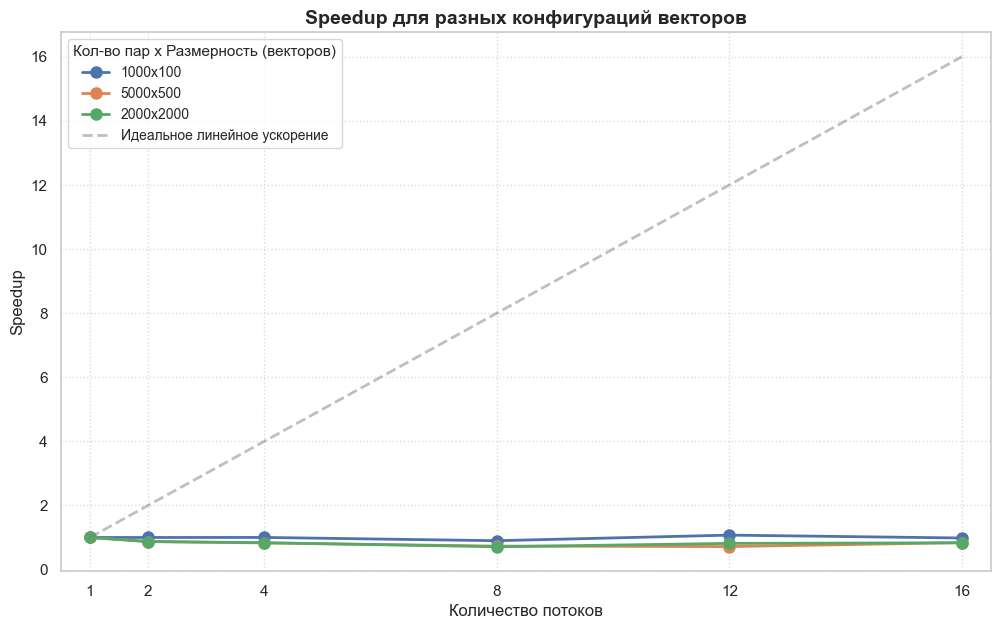

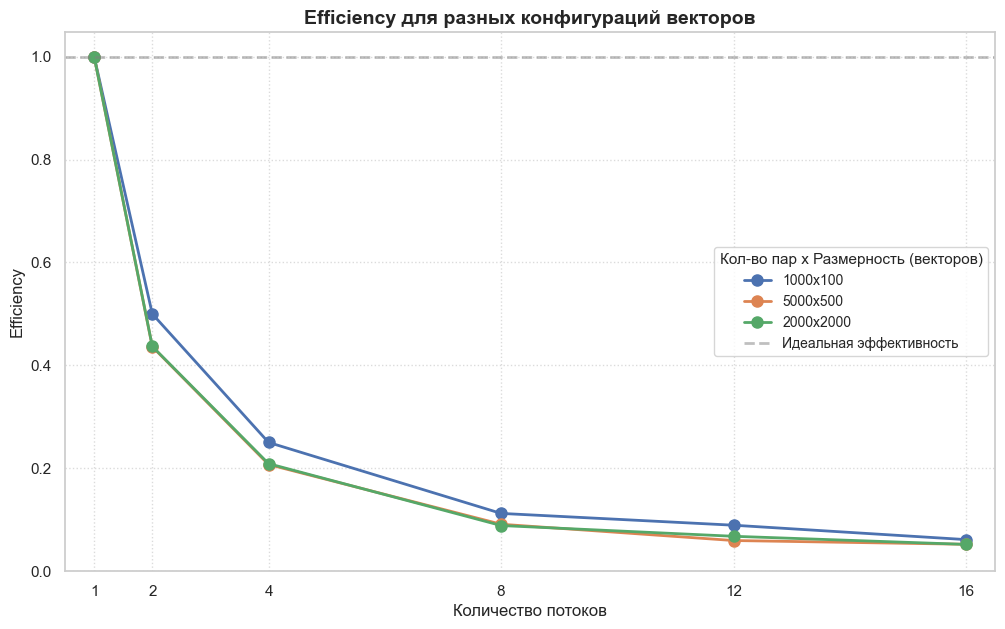

In [ ]:
for metric, ylabel in metrics:
    plt.figure(figsize=(12, 7))
    
    for config in configs:
        data = df[df['Config'] == config].sort_values('Threads')
        plt.plot(data['Threads'], data[metric], 
                 marker='o', linewidth=2, markersize=8, label=config)
    
    if metric == 'Speedup':
        max_th = df['Threads'].max()
        plt.plot([1, max_th], [1, max_th], 
                 '--', linewidth=2, color='gray', alpha=0.5, label='Идеальное линейное ускорение')
    elif metric == 'Efficiency':
        plt.axhline(1.0, linestyle='--', linewidth=2, color='gray', alpha=0.5, label='Идеальная эффективность')

    plt.title(f'{ylabel} для разных конфигураций векторов', fontsize=14, fontweight='bold')
    plt.xlabel('Количество потоков', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)
    
    if len(configs) <= 4:
        plt.legend(title='Кол-во пар x Размерность (векторов)', fontsize=10, title_fontsize=11)
    else:
        plt.legend(title='Кол-во пар x Размерность (векторов()', fontsize=9, title_fontsize=10, 
                   bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    plt.xticks(sorted(df['Threads'].unique()))
    plt.xlim(0.5, df['Threads'].max() + 0.5)
    
    if metric == 'Efficiency':
        plt.ylim(bottom=0)